#Second assignment of the course EE769 for the A.Y 2024.
Instructor: [Prof.Amit Sethi](https://www.ee.iitb.ac.in/~asethi/)

Click [here](https://iitbacin-my.sharepoint.com/:f:/g/personal/22d0382_iitb_ac_in/El0K78HhutNGi_fz0ikzkQQBPzIVLklrm4tCcuRyn8TAIQ?e=l8797B) for the video record of code-walk-through


Submission made by: Waisullah Yousofi \\
Roll number: 22D0382

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
np.random.seed(97)

# 1.	Write a function to generate an input data matrix X of size NxD for regression. [0.5]

a) Input: Sample size N and a generator matrix S of size MxD

b) Working: First generate a random 2-D array of size NxM where each column has a standard normal distribution and is independent of the other columns. Then multiply this with the generator matrix S of size MxD to give an output matrix X of size NxD. The idea here is that if the generator matrix S of size MxD is an identity matrix, then each column of X will remain independent; otherwise we can introduce correlations in the matrix columns of X.


In [112]:
# [1]
def getDataMatrix(N, S):
    """
    Generate input data matrix X for regression.

    Parameters:
    N (int): Sample size (number of rows).
    S (numpy array): Generator matrix of size MxD.


    Returns:
    X (ndarray): Generated input data matrix X of size N x D.
    """
    M = S.shape[0] #get the dimension of the generator matrix S

    Z = np.random.randn(N, M) # Step 1: Generate random matrix Z of size NxM with standard normal distribution

    X = np.dot(Z, S) #Step 2: Multiply Z by S to obtain matrix X of size NxD
    return X #return the obtained data matrix

In [113]:
# Generate the data matrix  X
N = 100  # Number of samples
M=D= 10   # Dimensions of Identity matrix S
S = np.eye(M, D) # Identity matrix keeps columns independent
X = getDataMatrix(N, S)
print("X with independent columns:\n", X.shape)

X with independent columns:
 (100, 10)


In [114]:
X[0]

array([-1.75118775, -0.42959835, -0.74638919,  1.00684764, -0.59112387,
       -1.12732903, -0.68193202, -0.97506076,  0.67544444, -0.25759799])

>#### rand vs randn

[Khan Academy](https://www.youtube.com/watch?v=VpuN8vCQ--M&ab_channel=KhanAcademy )

In [115]:
def compareRandAndRandn(n):

  uniform_n_iid_samples = np.random.rand(n)# draws or generates n randomly iid samples from a uniform distribution from the range of 0 to 1
  normal_n_iid_samples = np.random.randn(n)# draws n randomly iid samples from a standard normal distribution

  print("Mean of uniform distribution:", np.mean(uniform_n_iid_samples))
  print("Mean of standard normal distribution samples:", np.mean(normal_n_iid_samples))

  # [2]
  # Uniform distribution
  plt.figure(figsize=(6, 4))#10 inch hight by 6 inch width
  plt.subplot(1, 2, 1)#one row, two columns, column of below plot
  plt.hist(uniform_n_iid_samples, bins=30, color='blue')#the data is divided into 30 intervals of equal width
  plt.title('Uniform Distribution')
  plt.xlabel('Random-IID Samples')
  plt.ylabel('Frequency')

  # Normal distribution
  plt.subplot(1, 2, 2)# one row, two column and in the second column place the below graph.
  plt.hist(normal_n_iid_samples, bins=30, color='green')
  plt.title('Normal Distribution')
  plt.xlabel('Random-IID Samples')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()

Mean of uniform distribution: 0.5214080767996525
Mean of normal distribution samples: 0.092685455143077


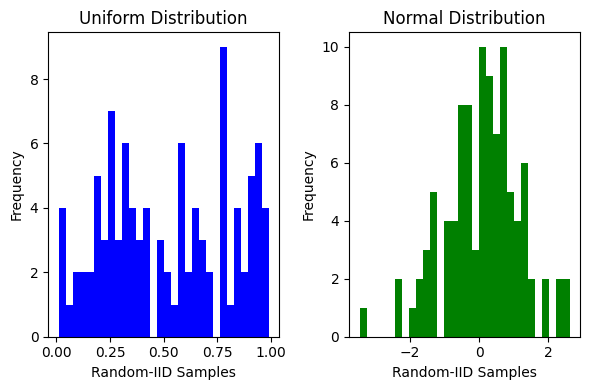

In [116]:
compareRandAndRandn(n=100)

Mean of uniform distribution: 0.5250320949577144
Mean of normal distribution samples: 0.02884780501851646


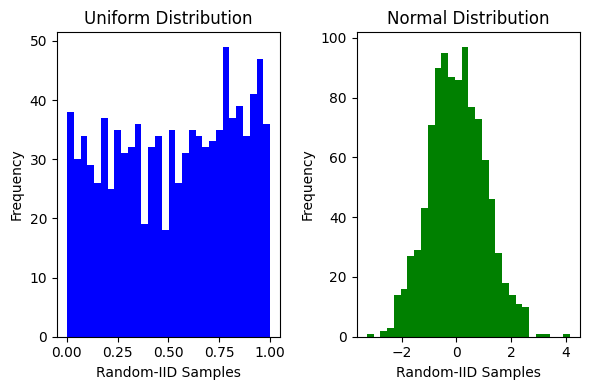

In [117]:
compareRandAndRandn(n=1000)

# 2. Write a function to generate the target vector t of size Nx1: [0.5]

a)	Input: Data matrix X of size NxD, weight vector w of size D+1 and noise variance σ

b)	Working: Check for dimension mismatch between X and w, multiply X with w (sans one element) and add the bias (the excluded element), then add zero-mean Gaussian noise with variance σ.


In [118]:
def generateTarget(X, w, sigma):
  """
  Generate the target vector t of size Nx1.

  Parameters:
  X (numpy array): Input data matrix of size NxD.
  w (numpy array): Weight vector of size D+1.
  sigma (float): Variance of the noise.

  Returns:
  t (numpy array): Target vector of size Nx1.
  """

  # Check for dimension mismatch between X and w
  if X.shape[1] != w.shape[0]:
    print("Dimension mismatch between X and w", X.shape, w.shape)
  # multiply X with w (sans one element) and add the bias (the excluded element)
  bias = w[-1]
  t = np.dot(X, w[:-1])+ bias

  # then add zero-mean Gaussian noise with variance sigma.
  # [3]
  mue = 0
  noise = np.random.normal(mue, scale = np.sqrt(sigma), size = t.shape)# draws random sample from Guassian distribution with the mean and variance defined by the user. Unlike, randome.randn() which draws from standard Guassian.

  # final target vector t with shape Nx1
  t = t + noise
  t = t.reshape(-1,1)#keeps the rows dimn unchanged and adds a dimn
  return t

In [119]:
# Generate the data matrix  X
N = 100  # Number of samples
M=D= 10   # Dimensions of Identity matrix S
S = np.eye(M, D) # Identity matrix keeps columns independent
X = getDataMatrix(N, S)
print("X with independent columns:\n", X.shape)
# Generate the target vector t
w = np.random.randn(D+1).reshape(-1,1) # weight vector of size  D+1 drawn from standard normal distribution
variance = 0.5 # variance of the noise
t = generateTarget(X, w, variance)
print(f"Target vector t: with shape: {t.shape}")

X with independent columns:
 (100, 10)
Dimension mismatch between X and w (100, 10) (11, 1)
Target vector t: with shape: (100, 1)


# 3.
* Examine the behavior of the analytical solver based on pseudo-inverse (pinv) in numpy.linalg package with respect to the size of the data matrix.

* Plot a graph of the time taken with respect to N (use log scale for both axes), with D fixed to 10. Is there any strange behavior in time taken to solve the problem above a particular value of N? What could be the reason for the same? [1]



**[4]**
> The pseudo-inverse of a matrix $X$, denoted $X^+$, is defined as: "the matrix that 'solves' [the least-squares problem](https://www.khanacademy.org/math/linear-algebra/alternate-bases/orthogonal-projections/v/linear-algebra-least-squares-approximation) $X\mathbf{w} = \mathbf{t}$," i.e., if $\mathbf{w}^*$ is said solution, then $X^+$ is that matrix such that $X^+\mathbf{t} = \mathbf{w}^*$.

> `Hence, the system of equation of is solved as follows:`        
  $w$  =  $pinv(X)⋅t$





[    100     372    1389    5179   19306   71968  268269 1000000]
Generated data matrix X of size: (100, 10)
Dimension mismatch between X and w (100, 10) (11, 1)
Generated Target vector t of size (100, 1)

Time taken to solve for N=100: 0.001384 seconds
Generated data matrix X of size: (372, 10)
Dimension mismatch between X and w (372, 10) (11, 1)
Generated Target vector t of size (372, 1)

Time taken to solve for N=372: 0.001158 seconds
Generated data matrix X of size: (1389, 10)
Dimension mismatch between X and w (1389, 10) (11, 1)
Generated Target vector t of size (1389, 1)

Time taken to solve for N=1389: 0.002317 seconds
Generated data matrix X of size: (5179, 10)
Dimension mismatch between X and w (5179, 10) (11, 1)
Generated Target vector t of size (5179, 1)

Time taken to solve for N=5179: 0.004281 seconds
Generated data matrix X of size: (19306, 10)
Dimension mismatch between X and w (19306, 10) (11, 1)
Generated Target vector t of size (19306, 1)

Time taken to solve for N=19

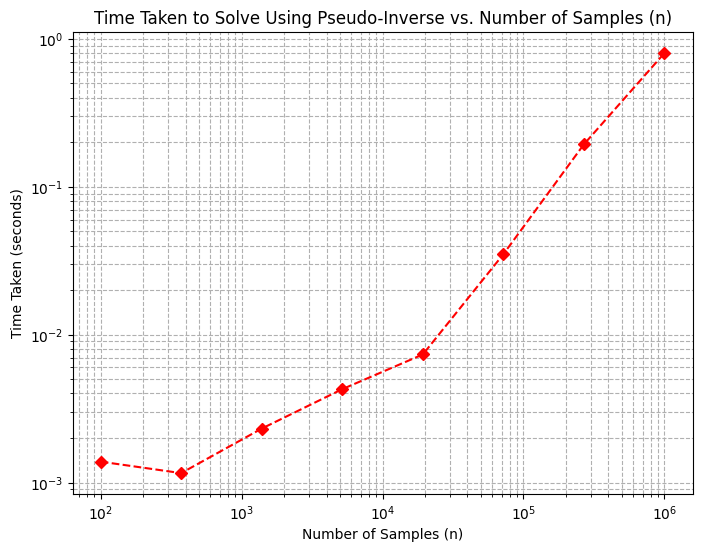

In [120]:
data_sizes = np.logspace(2, 6, 8, dtype=int)# list of different sizes of data matrix
print(data_sizes)

times = []# list to store the time taken for each N

M=D= 10  # Dimensions of the generator matrix S with fixed D=10
S = np.eye(M, D)  # Identity generator matrix of size MxD.

for n in data_sizes:# loop over different n sizes
  X = getDataMatrix(n, S)
  print("Generated data matrix X of size:", X.shape)

  # Generate target t
  w = np.random.randn(D+1).reshape(-1,1) # weight vector of size  D+1
  variance = 0.5 # variance of the noise
  t = generateTarget(X, w, variance)
  print(f"Generated Target vector t of size {t.shape}\n")

  start_time = time.time() #measure the time taken to solve the system using pseudo-inverse

  # [5]
  # Compute pseudo-inverse of X
  X_pinv = np.linalg.pinv(X)

  # Solve for w using pseudo-inverse
  w_star = X_pinv @ t  # @ is the matrix multiplication operator. This is the same as np.dot() but more readable and is a feature of in python3.

  end_time = time.time()#the ending time captured

  # the elapsed time
  elapsed_time = end_time - start_time
  times.append(elapsed_time)
  print(f"Time taken to solve for N={n}: {elapsed_time:.6f} seconds")#upto 6 decimal points to see the elapsed time

# Plotting the time taken vs N on a log-log scale
plt.figure(figsize=(8, 6))
plt.plot(data_sizes, times, marker='D', linestyle='--', color='r')
plt.xscale('log')  # Log scale for n
plt.yscale('log')  # Log scale for time
plt.xlabel("Number of Samples (n)")
plt.ylabel("Time Taken (seconds)")
plt.title("Time Taken to Solve Using Pseudo-Inverse vs. Number of Samples (n)")
plt.grid(True, which="both", ls="--")
plt.show()

# 4.
Write a function to calculate the normalized root mean squared error (NRMSE) between a target vector t and a predicted vector y. [0.5]



> NRMSE

  - NRMSE is a metric used to evaluate the performance of regression models.
  Since the target variable t and predicted variable y are in different scales, latter being from normale distribution and the former from standard normale distribution, we need to use NRMSE.
  
  - Close to zero NRMSE indicates the regression model is a good fit.
  - The sd-based NRMSE represent the ratio between the variation not explained by the regression vs the overall variation in Y. If the regression explains all of the variation in Y, nothing gets unexplained and the RMSE, and consequently NRMSE is zero.

$$
\text{NRMSE}_{\text{std}} = \frac{\text{RMSE}}{\sigma_t}
$$


In [121]:
# [6]
def nrmse(t, y):
  """
  Calculate the normalized root mean squared error (NRMSE) between target vector t and predicted vector y.


  Parameters:
  t (numpy array): Target vector of size Nx1.
  y (numpy array): Predicted vector of size Nx1.

  Returns:
  nrmse (float): Normalized root mean squared error.
  """

  squared_sum = np.sum((t-y)**2)
  mse = squared_sum/len(t)
  rmse = np.sqrt(mse)
  nrmse = rmse/np.std(t)
  return nrmse

In [122]:
y = np.dot(X, w_star)

In [123]:
X.shape

(1000000, 10)

In [124]:
w_star.shape

(10, 1)

In [125]:
y.shape

(1000000, 1)

In [126]:
t.shape

(1000000, 1)

In [127]:
print(nrmse(t,y))

0.3811651192846066


# 5.
Write a function to calculate gradient of mean squared error (MSE) with respect to weights of linear regression. Figure out what should be the inputs and outputs. [0.5]



\begin{align*}\\
Y &= W^T X + B  \\
Y\ repsents\ \ the\ linear\ regression\ equation where\ W\  is\ the\ weight\ vector\ and\ B\ is\ the\ bias\
term. \\
\text{MSE} &= \frac{1}{n} \sum_{i=1}^{n} \left( t_i - y_i \right)^2 \\
\frac{\partial \text{MSE}}{\partial w} &= \frac{-2}{n} \sum_{i=1}^{n} \left(t_i - y_i\right) x_i\\
\frac{\partial \text{MSE}}{\partial b} &= \frac{-2}{n} \sum_{i=1}^{n} \left(t_i - y_i\right)
\end{align*}




In [128]:
#[7] with major modification.
def gradient_mse(X, t, y):
  """
  calculation of the gradient of mean squared error (MSE) with respect to weights of linear regression.

  Parameters:
  X (numpy array): Input data matrix
  t (numpy array): Target vector
  y (numpy array): Predicted vector

  Returns:
  gradient (numpy array): Gradient of MSE with respect to weights
  """

  N = X.shape[0]  # number of samples
  error = t-y # the error part

  dMSE_dW = (-2/N) * X.T.dot(error)# gradient of MSE w.r.t weights

  dMSE_db = (-2/N) * error.sum()# gradient of MSE w.r.t bias term
  return dMSE_dW, dMSE_db

In [129]:
# Generate the data matrix  X
N = 100  # Number of samples
M=D= 10   # Dimensions of Identity matrix S
S = np.eye(M, D) # Identity matrix keeps columns independent
X = getDataMatrix(N, S)
print("X with independent columns:\n", X.shape)

# Generate the target vector t
wt = np.random.randn(D+1).reshape(-1,1) # weight vector of size  D+1 drawn from  standard normal distribution which introduce the true weights and bias
sigma = 0.1  # Variance of noise

t = generateTarget(X, wt, sigma)
print(f"Target vector t: with shape: {t.shape}")

# Initialize model weights and bias for training
W = np.zeros((X.shape[1], 1))  # Initialize weights as zeros
b = 0  # Initialize bias as zero
y = X.dot(W) + b  # Predicted values
dMSE_dW,_ = gradient_mse(X, t, y) # gradient of mean squared error (MSE) with respect to weights
print("\n dMSE_dW of shape:",dMSE_dW.shape)

X with independent columns:
 (100, 10)
Dimension mismatch between X and w (100, 10) (11, 1)
Target vector t: with shape: (100, 1)

 dMSE_dW of shape: (10, 1)


In [130]:
print(W.shape)

(10, 1)


In [131]:
print(dMSE_dW)

[[-1.61148134]
 [ 4.31246893]
 [ 0.1549659 ]
 [ 0.58969429]
 [-0.69866309]
 [-1.69773036]
 [-1.75258306]
 [ 2.38029153]
 [ 1.3195729 ]
 [ 0.77137338]]


# 6.
Write a function to calculate gradient of L2 norm of weights with respect to weights. [0.5]

In [132]:
# [8]
def gradient_L2(w, lmbda=1):
  """
  Calculates the gradient of L2 norm of weights with respect to weights
  Parameters:
  w (numpy array): Weight vector
  Returns:
  gradient (numpy array): Gradient of L2 norm with respect to weights
  """
  gradient = 2 * lmbda * w
  return gradient

In [133]:
lmbda = 1
print(f"{gradient_L2(W, lmbda)},\n {gradient_L2(W, lmbda).shape}")

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]],
 (10, 1)


# 7.
Write a function to calculate gradient of L1 norm of weights with respect to weights. [0.5]

In [134]:
# [9]
def gradient_L1(w,lmbda):
  """
  Calculates the gradient of L1 norm of weights with respect to weights

  Parameters:
  w (numpy array): Weight vector

  Returns:
  gradient (numpy array): Gradient of L1 norm with respect to weights
  """
  gradient = lmbda*np.sign(w)# if the wi>0 then 1 else -1
  return gradient


In [135]:
gradient_L1(W,lmbda=1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

# 8.
Write a function to perform gradient descent on
> ##### MSE + λ1 L1 + λ2 L2

for linear regression. Use an appropriate stopping criterion. [1]

######Eqation

\begin{align*}
Y &= W^T X + B  \\
& \text{where } Y \text{ represents the output of the linear regression equation, } W \text{ is the weight vector, and } B \text{ is the bias term.} \\
\text{MSE} &= \frac{1}{n} \sum_{i=1}^{n} \left( t_i - y_i \right)^2 \\
\frac{\partial \text{MSE}}{\partial w} &= \frac{-2}{n} \sum_{i=1}^{n} \left(t_i - y_i\right) x_i \\
\frac{\partial \text{MSE}}{\partial b} &= \frac{-2}{n} \sum_{i=1}^{n} \left(t_i - y_i\right) \\
W_{\text{new}} &= W_{\text{old}} - \eta \cdot \frac{\partial \text{MSE}}{\partial w} \\
b_{\text{new}} &= b_{\text{old}} - \eta \cdot \frac{\partial \text{MSE}}{\partial b}
\end{align*}



- Derivative of bot regulizations is also considered.

In [136]:
# [10]
def gradient_descent(X, t,learning_rate, lambda1, lambda2, max_iterations, tol=1):
    """
    Perform gradient descent to minimize MSE + λ1 L1 + λ2 L2 for linear regression.

    Parameters:
    X (np.ndarray): Input feature matrix of shape (n_samples as N, n_features as D)
    t (np.ndarray): Target vector of shape (n_samples, )
    learning_rate (float): Learning rate for weight updates
    lambda1 (float): Regularization parameter for L1 (Lasso)
    lambda2 (float): Regularization parameter for L2 (Ridge)
    max_iterations (int): Maximum number of iterations
    tol (float): Tolerance for stopping criterion based on loss

    Returns:
    W (np.ndarray): Final weight vector after optimization losses (list): List of loss values at each iteration
    """

    weights = np.zeros(X.shape[1]).reshape(-1,1)  # Initialize weights
    bias = 0
    losses = []

    for iteration in range(max_iterations):
      y = np.dot(X, weights)+ bias

      # Calculate the loss (MSE + L1 + L2 regularization)
      mse = np.mean((t-y) ** 2)
      l1_reg = lambda1 * np.sum(np.abs(weights))
      l2_reg = lambda2 * np.sum(weights ** 2)
      loss = mse + l1_reg + l2_reg
      losses.append(loss)

      # Print the loss every 5 iterations
      if iteration % 5 == 0:
        print(f"Iteration {iteration}, Loss: {loss}")

      # Compute the gradient where we use already defined functions
      dMSE_dW, dMSE_db = gradient_mse(X, t, y) # Gradient of MSE
      l1_gradient = gradient_L1(weights, lambda1) # Gradient of L1
      l2_gradient = gradient_L2(weights, lambda2) # Gradient of L2
      gradient = dMSE_dW + l1_gradient + l2_gradient


      # Update each of the parameters
      weights = weights - learning_rate * gradient
      bias = bias - learning_rate * dMSE_db

      # Stopping criterion: if loss does not decrease by tol unit

      if iteration > 0 and losses[-2] - losses[-1] < tol:
          print(f"Converged after {iteration} iterations.")
          return weights, bias, losses


    # If the loop finishes, return the last weights and losses
    print(f"Reached maximum iterations: {max_iterations}")
    return weights, bias, losses

In [137]:
# Generating data matrix X
N = 100  # Sample size
M, D = 10, 10  # Dimensions of the generator matrix S
S = np.eye(M, D)  # Random generator Identity matrix of size MxD
X = getDataMatrix(N, S)
print("Generated data matrix X of size:", X.shape)

# Generate the target vector t
wt = np.random.randn(D+1).reshape(-1,1) # weight vector of size  D+1 drawn from  standard normal distribution which introduce the true weights and bias

sigma = 0.1  # Variance of noise
t = generateTarget(X, wt, sigma)
print(f"Target vector t: with shape: {t.shape}")

# Set hyperparameters
learning_rate = 0.001
lambda1 = 0.1  # L1 regularization
lambda2 = 0.1  # L2 regularization
max_iterations = 10000
stopping_losss = 1e-5
print(f"Stopping criteria is loss:\t {stopping_losss}")

# Generating data matrix X
N = 100  # Sample size
M, D = 10, 10  # Dimensions of the generator matrix S
S = np.eye(M, D)  # Random generator Identity matrix of size MxD
X = getDataMatrix(N, S)
print("Generated data matrix X of size:", X.shape)

# Generate the target vector t
wt = np.random.randn(D+1).reshape(-1,1) # weight vector of size  D+1 drawn from  standard normal distribution which introduce the true weights and bias

sigma = 0.1  # Variance of noise
t = generateTarget(X, wt, sigma)
print(f"Target vector t: with shape: {t.shape}")

# Set hyperparameters
learning_rate = 0.001
lambda1 = 0.1  # L1 regularization
lambda2 = 0.1  # L2 regularization
max_iterations = 10000
stopping_losss = 1e-5
print(f"Stopping criteria is loss:\t {stopping_losss}")

# Perform gradient descent
weights, bias, losses = gradient_descent(
    X, t, learning_rate, lambda1, lambda2, max_iterations, tol=stopping_losss)
y = np.dot(X, weights) + bias
print("NRMSE", nrmse(t, y))

Generated data matrix X of size: (100, 10)
Dimension mismatch between X and w (100, 10) (11, 1)
Target vector t: with shape: (100, 1)
Stopping criteria is loss:	 1e-05
Generated data matrix X of size: (100, 10)
Dimension mismatch between X and w (100, 10) (11, 1)
Target vector t: with shape: (100, 1)
Stopping criteria is loss:	 1e-05
Iteration 0, Loss: 17.863995092163183
Iteration 5, Loss: 17.47369166829536
Iteration 10, Loss: 17.09583896831605
Iteration 15, Loss: 16.728136860706726
Iteration 20, Loss: 16.37029128132984
Iteration 25, Loss: 16.0220289543207
Iteration 30, Loss: 15.683081637982651
Iteration 35, Loss: 15.353182946226658
Iteration 40, Loss: 15.032081302517847
Iteration 45, Loss: 14.71952971836896
Iteration 50, Loss: 14.415288379738191
Iteration 55, Loss: 14.119124433998202
Iteration 60, Loss: 13.830811783322408
Iteration 65, Loss: 13.550130884293262
Iteration 70, Loss: 13.276868553543325
Iteration 75, Loss: 13.0108177792457
Iteration 80, Loss: 12.751777538275952
Iteration 8

# 9

* Examine the impact of σ on the NRMSE for linear regression using gradient descent.
* Average the results of the following experiment run five times for each value of σ where S is an identity matrix.
* Generate a random data matrix X and target vector t with noise variance σ, and split it into training and validation sub-matrices and sub-vectors.
* Train using gradient descent on training subset, and test on the validation subset.
* Plot average NRMSE on validation subset for five runs versus σ. Comment on the results. [1.5]


In [138]:
# Generating data matrix X
N = 100  # Sample size
M, D = 10, 10  # Dimensions of the generator matrix S
S = np.eye(M, D)  # Random generator Identity matrix of size MxD
X = getDataMatrix(N, S)
print("Generated data matrix X of size:", X.shape)

# Generate the target vector t
wt = np.random.randn(D+1).reshape(-1,1) # weight vector of size  D+1 drawn from  standard normal distribution which introduce the true weights and bias

sigmas = [0, 0.2, 0.8, 0.9]  # variances of the noise

# Set hyperparameters
learning_rate = 0.01
lambda1 = 0  # L1 regularization
lambda2 = 0  # L2 regularization
max_iterations = 10000
stopping_losss = 1e-5
print(f"Stopping criteria is loss:\t {stopping_losss}")

avg_nrmse = []
for variance in sigmas:
    ls_nrmse  =[]
    for i in range(5):# generate random t values with the same variance for 5 times
      t = generateTarget(X, w, variance)

      X_train, X_val, t_train, t_val = X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

      # Perform gradient descent
      weights, bias, losses = gradient_descent(X_train, t_train, learning_rate, lambda1, lambda2, max_iterations, tol=stopping_losss)

      y = np.dot(X_val, weights) + bias
      ls_nrmse.append(nrmse(t_val, y))
    print(f"\nFor the noise variance of {variance} the average NRMSE is {np.mean(ls_nrmse)}\n\n")
    avg_nrmse.append(np.mean(ls_nrmse))

Generated data matrix X of size: (100, 10)
Stopping criteria is loss:	 1e-05
Dimension mismatch between X and w (100, 10) (11, 1)
Iteration 0, Loss: 3.4174440254518657
Iteration 5, Loss: 2.6971309780552133
Iteration 10, Loss: 2.149779715269397
Iteration 15, Loss: 1.730293556179459
Iteration 20, Loss: 1.4058950558772212
Iteration 25, Loss: 1.1526742554461307
Iteration 30, Loss: 0.953117607129608
Iteration 35, Loss: 0.7943367648078874
Iteration 40, Loss: 0.6667972083685554
Iteration 45, Loss: 0.5634041467395481
Iteration 50, Loss: 0.4788440522732804
Iteration 55, Loss: 0.4091093045460001
Iteration 60, Loss: 0.3511541660148072
Iteration 65, Loss: 0.30264509342727725
Iteration 70, Loss: 0.2617789266313505
Iteration 75, Loss: 0.22715001306678878
Iteration 80, Loss: 0.19765269132131183
Iteration 85, Loss: 0.17240938936429745
Iteration 90, Loss: 0.15071733268674126
Iteration 95, Loss: 0.13200881797510938
Iteration 100, Loss: 0.1158214122970552
Iteration 105, Loss: 0.10177544505778188
Iteratio

>  #### Plot average NRMSE on validation subset for five runs versus σ

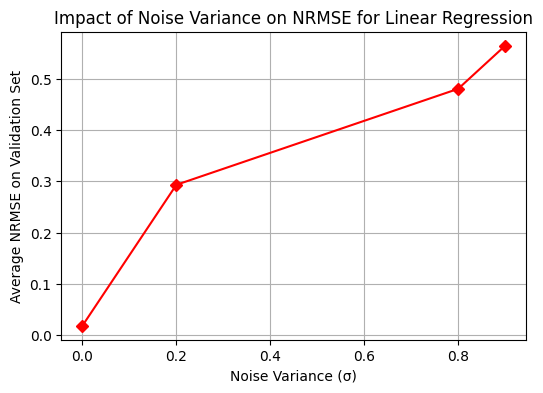

In [139]:
plt.figure(figsize=(6, 4))# set the figure size
plt.plot(sigmas, avg_nrmse, marker='D', linestyle='-', color='r')# plot a red trend line with diamond marker.
plt.xlabel("Noise Variance (σ)")
plt.ylabel("Average NRMSE on Validation Set")
plt.title("Impact of Noise Variance on NRMSE for Linear Regression")
plt.grid(True)
plt.show()

> ##### Comment on the results. [1.5]

* Above plot illustrates that as we increase the variance of the target data the Average of NRMSE increases for testing the validation split.
* Average NRMSE is the lowest, just above 0.15, whereas it has experienced a significant jumpt of reaching around 0.45 with an increased variance of 0.9 to the Guassian noise on the target t.


Note: everytime we run the file we may get different values. But, the trend of fact remains true.

# 10
* Examine the impact of N and λ2 on the NRMSE for linear regression using gradient descent.

  * Create lists of N and λ2 values (use log scale, 5 each, 25 pairs).
  * Average the results of the following experiment run five times for combination of N and λ2 value pair for a fixed generator matrix G and noise variance σ. Comment on the results. [1.5]

In [140]:
# [11]
# synatx: np.logspace(start, stop, size)
N_values = np.logspace(2, 6, 5, dtype=int)
lmbda2_values = np.logspace(-2, 2, 5)# float
print(N_values)
print(lmbda2_values)

[    100    1000   10000  100000 1000000]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [141]:
[f"{val:.6f}" for val in lmbda2_values]

['0.010000', '0.100000', '1.000000', '10.000000', '100.000000']

In [142]:
# [12]
def regn_experiment(N_values, lmbda2_values, D=10, M=10, sigma=0.51, lr=0.01, max_iter=1, lambda1=0):
  """
  Examine the impact of N and λ2 on the NRMSE for linear regression using gradient descent.

  Parameters:
  N_values (list): List of N values
  lmbda2_values (list): List of λ2 values
  D (int): Dimension of the input data
  M (int): Dimension of the generator matrix
  sigma (float): Noise variance
  lr (float): Learning rate
  max_iter (int): Maximum number of iterations
  lambda1 (float): L1 regularization parameter

  Returns:
  results (numpy array): Array of shape (len(N_values), len(lmbda2_values))
  containing the average NRMSE for each combination of N and λ2.
  """

  results = np.zeros((len(N_values), len(lmbda2_values)))

  for i, N in enumerate(N_values):
      for j, lmbda2 in enumerate(lmbda2_values):
          nrmse_list = []
          for _ in range(5):  # Average over 5 runs
              X = getDataMatrix(N, S)
              wt  = np.random.randn(D+1)
              t = generateTarget(X, wt, sigma)

              # Perform gradient descent
              weights, bias, losses = gradient_descent(X, t, learning_rate, lambda1, lmbda2, max_iter, tol=stopping_losss)
              y = np.dot(X, weights) + bias
              nrmse_list.append(nrmse(t, y))

          print(f"\nN{i} = {N}----Lambda2-{j} = {lmbda2}--- the average NRMSE is {np.mean(nrmse_list)}")
          # Average NRMSE over 5 runs
          results[i, j] = np.mean(nrmse_list)
  return results

In [143]:
results = regn_experiment(N_values, lmbda2_values, max_iter=100, lambda1=0)

Dimension mismatch between X and w (100, 10) (11,)
Iteration 0, Loss: 8.574885754764287
Iteration 5, Loss: 6.722171610194351
Iteration 10, Loss: 5.339185663952297
Iteration 15, Loss: 4.298654825240823
Iteration 20, Loss: 3.509289903531831
Iteration 25, Loss: 2.9053448064634435
Iteration 30, Loss: 2.439252480997693
Iteration 35, Loss: 2.0764224294484017
Iteration 40, Loss: 1.7915584155836384
Iteration 45, Loss: 1.5660465533130243
Iteration 50, Loss: 1.3860980847593638
Iteration 55, Loss: 1.2414250891094347
Iteration 60, Loss: 1.1242931937326168
Iteration 65, Loss: 1.0288415232100747
Iteration 70, Loss: 0.9505925189171821
Iteration 75, Loss: 0.8860970163298565
Iteration 80, Loss: 0.8326759644274982
Iteration 85, Loss: 0.7882314303297151
Iteration 90, Loss: 0.7511074659639434
Iteration 95, Loss: 0.7199870120073264
Reached maximum iterations: 100
Dimension mismatch between X and w (100, 10) (11,)
Iteration 0, Loss: 8.664777483927212
Iteration 5, Loss: 7.105841305462381
Iteration 10, Loss: 

In [144]:
results

array([[0.32630182, 0.29813415, 0.54289214, 0.90013984, 1.00440972],
       [0.27378874, 0.2967412 , 0.54821069, 0.91361758, 1.00629665],
       [0.27725807, 0.29481933, 0.56035991, 0.91485898, 1.00023976],
       [0.23764494, 0.31016314, 0.54682122, 0.9151637 , 0.99470558],
       [0.26256009, 0.32483309, 0.54601573, 0.91741857, 1.00560661]])

In [145]:
for N_index in range(len(N_values)):
  lambda_index = np.argmin(results[N_index])
  lambda_value = lmbda2_values[lambda_index]
  print(f"The optimal lambda2 value for N={N_values[N_index]} is {lambda_value}")

The optimal lambda2 value for N=100 is 0.1
The optimal lambda2 value for N=1000 is 0.01
The optimal lambda2 value for N=10000 is 0.01
The optimal lambda2 value for N=100000 is 0.01
The optimal lambda2 value for N=1000000 is 0.01


##### Comment:
* The question that can be answered through the above experiment where we examined what is the relation between lambda2? Which means we want to know what will happen to lambda when we increase the number of samples.

* We will see that for different sample sizes, perhaps
different optimal lambda2 values are obtained.

* As it can be seen above, it is also possible that for different values of N or sample sizes, the same optimal lambda values are found. One reason could be due to the fact that the variance of all the samples sizes are identical.



#11.
* Examine the impact of λ1 on variable elimination.
  * Generate a single data matrix X and plot weights versus 1/λ1.
  * Comment on the results.
  * Introduce correlations in the columns of X and repeat the experiment.
  * Are the results different? Comment on the results. [1]

In [146]:
def lambda1_effect(X, title):

  """
  This function examins the effect of lambda1 for a fixec data matrix X.

  Parameters:
  X (ndarray): Input data marix X of size NxD.
  title (string): Specific title for the graph.
  """


  # Set hyperparameters
  learning_rate = 0.01# learning rate
  lambda2 = 0  # L2 regularization
  max_iterations = 100# maximum number of epochs
  stopping_losss = 1e-1# when should the training stop
  print(f"Stopping criteria is loss:\t {stopping_losss}")

  lambda1_values = [0.01, 0.1, 1, 10, 12]# list of lambda1 values.
  weights_list = []# to stores weights of training with different lambda1

  for l1 in lambda1_values: # Perform gradient descent
    weights, bias,  losses = gradient_descent(
        X, t, learning_rate, l1, lambda2, max_iterations, tol=stopping_losss)
    weights_list.append(weights)

  # Plot weights versus 1/lambda1
  plt.figure(figsize=(10, 6))
  for i in range(D):# we have D weights for D features. So, loop through each weight
    plt.plot([1/l for l in lambda1_values], [w[i] for w in weights_list], label=f'Weight {i}', marker='D')
  title = 'Weights vs 1/Lambda1 for the '+ title
  plt.xlabel('1/Lambda1')
  plt.ylabel('Weight Value')
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.show()

Generated data matrix X of size: (100, 10)
Dimension mismatch between X and w (100, 10) (11, 1)
Target vector t: with shape: (100, 1)
Stopping criteria is loss:	 0.1
Iteration 0, Loss: 3.8196789973014744
Iteration 5, Loss: 3.1102709170389926
Iteration 10, Loss: 2.550815621926586
Converged after 11 iterations.
Iteration 0, Loss: 3.8196789973014744
Iteration 5, Loss: 3.182042218138002
Converged after 8 iterations.
Iteration 0, Loss: 3.8196789973014744
Converged after 1 iterations.
Iteration 0, Loss: 3.8196789973014744
Converged after 1 iterations.
Iteration 0, Loss: 3.8196789973014744
Converged after 1 iterations.


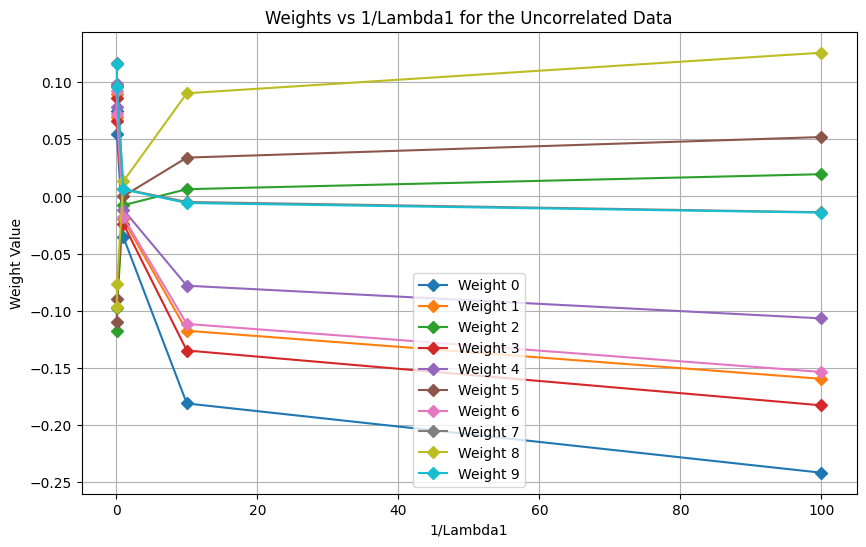

In [147]:
# Generating a single data matrix X
N = 100  # Sample size
M, D = 10, 10  # Dimensions of the generator matrix S
S = np.eye(M, D)  # Random generator identity matrix of size MxD
X = getDataMatrix(N, S)
print("Generated data matrix X of size:", X.shape)

# Generate the target vector t
wt = np.random.randn(D+1).reshape(-1,1) # weight vector of size  D+1 drawn from  standard normal distribution which introduce the true weights and bias

sigma = 0.1  # Variance of noise
t = generateTarget(X, wt, sigma)
print(f"Target vector t: with shape: {t.shape}")
lambda1_effect(X, title = "Uncorrelated Data")

---
> Comment:
- As the above plot illustrates,  L1 regularization has the property of eliminating the effect of some features of X through the corresponding weight values- equating weights to zero or close to zero.
- In our case, weight of the 4th feature is almost always zero.

---




correlated data matrix X of size: (100, 10)
Stopping criteria is loss:	 0.1
Iteration 0, Loss: 3.8196789973014744
Iteration 5, Loss: 2.939791741291255
Iteration 10, Loss: 2.3590330759587412
Converged after 11 iterations.
Iteration 0, Loss: 3.8196789973014744
Iteration 5, Loss: 3.012864108839052
Converged after 9 iterations.
Iteration 0, Loss: 3.8196789973014744
Converged after 2 iterations.
Iteration 0, Loss: 3.8196789973014744
Converged after 1 iterations.
Iteration 0, Loss: 3.8196789973014744
Converged after 1 iterations.


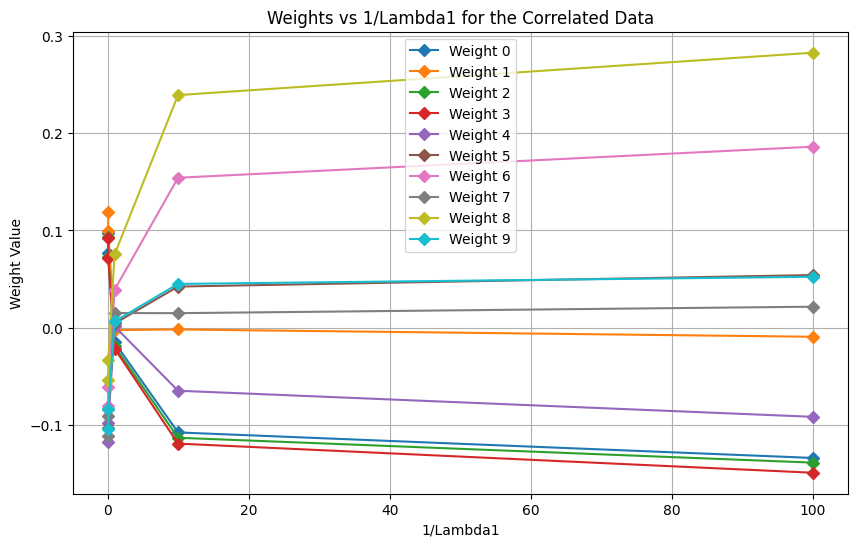

In [148]:
# Generating a single data matrix X the columns which are correlated
M, D = 10, 10  # Dimensions of the generator matrix S
S_randn = np.random.randn(M, D)  # Random generator matrix of size MxD
X_corrted = np.dot(X, S_randn)
print("correlated data matrix X of size:", X_corrted.shape)
lambda1_effect(X_corrted, title = "Correlated Data")

---
> Comment:
- We can see that, even after introducing correlation to the columns of X, none of them are forced to have the same weights.
- Even in the correlated scenario, some weghts are almost kept 0, which meant to eliminate the corresponding features.

---




# 12.
Show the grouping effect of elastic net on correlated columns of X. [1]

Iteration 0, Loss: 3.8196789973014744
Iteration 5, Loss: 2.9323043520034386
Iteration 10, Loss: 2.3450938298968587
Iteration 15, Loss: 1.9162980054723877
Iteration 20, Loss: 1.5962673043075533
Iteration 25, Loss: 1.3534104505720679
Iteration 30, Loss: 1.1663095592870587
Iteration 35, Loss: 1.0200638502386277
Iteration 40, Loss: 0.9041443399073553
Iteration 45, Loss: 0.8110235262999067
Iteration 50, Loss: 0.7352630739005402
Iteration 55, Loss: 0.6728930179381706
Iteration 60, Loss: 0.6209839805580666
Iteration 65, Loss: 0.5773499161426803
Iteration 70, Loss: 0.5403401935352633
Iteration 75, Loss: 0.5086948153793274
Iteration 80, Loss: 0.4814562187841395
Iteration 85, Loss: 0.4578416452471899
Iteration 90, Loss: 0.437244767314976
Iteration 95, Loss: 0.41917973193610936
Reached maximum iterations: 100
Iteration 0, Loss: 3.8196789973014744
Iteration 5, Loss: 3.019584168303858
Iteration 10, Loss: 2.5171873166848355
Iteration 15, Loss: 2.158277851713449
Iteration 20, Loss: 1.8953533559335105

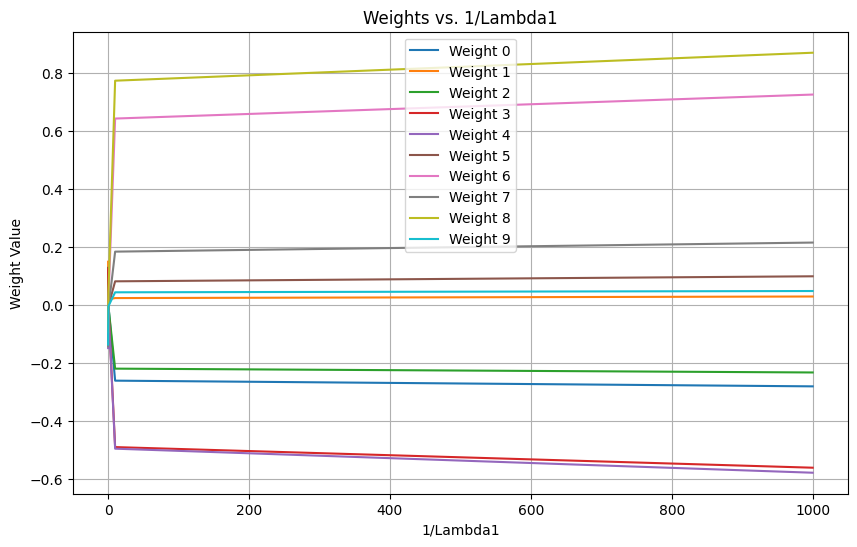

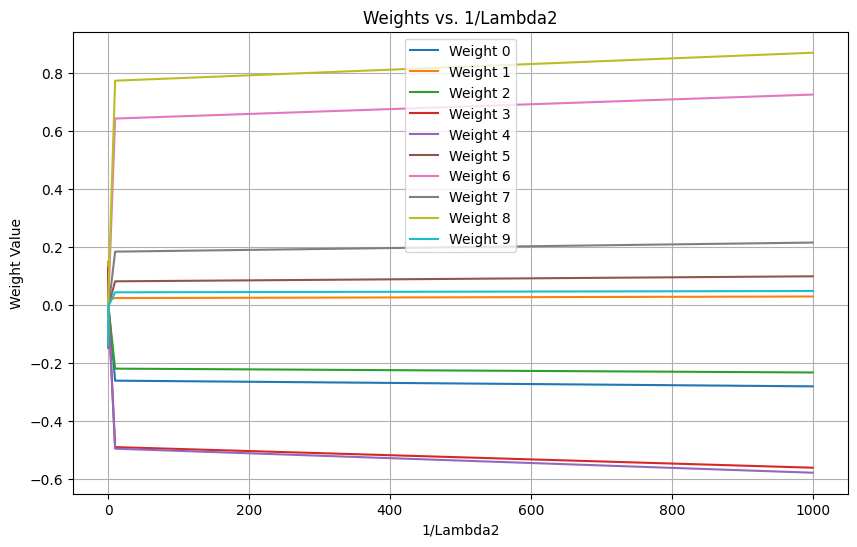

In [167]:
lambda2_values = lambda1_values = [0.001, 0.1, 2, 10, 15]
weights_list = []
for i in range(len(lambda1_values)):
  # Perform gradient descent
  weights, bias,  losses = gradient_descent(
      X_corrted, t, learning_rate, lambda1_values[i], lambda2_values[i], max_iterations, tol=stopping_losss)
  weights_list.append(weights)

# Plot weights versus 1/lambda1
plt.figure(figsize=(10, 6))
for i in range(D):
  plt.plot([1/l for l in lambda1_values], [w[i] for w in weights_list], label=f'Weight {i}')

plt.xlabel('1/Lambda1')
plt.ylabel('Weight Value')
plt.title('Weights vs. 1/Lambda1')
plt.legend()
plt.grid(True)
plt.show()


# Plot weights versus 1/lambda2
plt.figure(figsize=(10, 6))
for i in range(D):
  plt.plot([1/l for l in lambda2_values], [w[i] for w in weights_list], label=f'Weight {i}')

plt.xlabel('1/Lambda2')
plt.ylabel('Weight Value')
plt.title('Weights vs. 1/Lambda2')
plt.legend()
plt.grid(True)
plt.show()

---
> Comment on question number 12:
- The above figure shows that, elastic net takes the advantage of both words (lambda1 and lambda2).
- It means, elastic net can eliminate groups of correlted columns. Grouping part is done by lambda2 and elimination with lambda1.
- In our case, it truns out weights for the column number 3, 4 are forced to group together and have similar weight values. More of similar behavour can be seen for other weights.

---



# 13.
Write a function for generating linear binary classification vector t with noise variance σ. [0.5]

In [150]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [151]:
def generate_binary_targets(X_data, wt, biast, sigma):
    """
    Generate binary classification targets with noise.

    Parameters:
    X_data (ndarray): Input data matrix of size N x D.
    wt (ndarray): Weight vector of size D.
    biast (float): Bias term.
    sigma (float): Standard deviation of Gaussian noise.

    Returns:
    binary_t (ndarray): Binary classification target vector of size N (0s and 1s).
    """
    # Step 1: Calculate the linear combination of inputs X and weights w
    # linear_combination = np.dot(X_data, wt) + biast
    zt = np.dot(X_data, wt) + biast

    # Step 2: Add Gaussian noise with std sqrt(sigma)
    mue = 0
    noise = np.random.normal(mue, scale = np.sqrt(sigma), size = zt.shape)# draws random sample from Guassian distribution with the mean and variance defined by the user. Unlike, randome.randn().


    noisy_zt = zt + noise
    # Step 3: Convert the noisy linear combination into binary classification (0 or 1)

    h = sigmoid(zt).reshape(-1,1)
    threshold = 0.5

    binary_t = [1 if hi > threshold else 0 for hi in h]
    binary_t = np.array(binary_t).reshape(-1,1)
    return binary_t

In [152]:
# Generating data matrix X
N = 100  # Sample size
M, D = 10, 10  # Dimensions of the generator matrix S
S = np.eye(M, D)  # Random generator Identity matrix of size MxD
X_data = getDataMatrix(N, S)
print("Generated data matrix X of size:", X_data.shape)

# Define random weights w and a bias term
wt = np.random.randn(D+1).reshape(-1,1)
wt = wt[:-1]
biast = wt[-1]

# Define noise standard deviation (sigma)
sigma = 0.1

# Generate binary classification target vector t
binary_t = generate_binary_targets(X_data, wt, biast, sigma)
print("Binary classification target vector t:\n", binary_t.shape)

Generated data matrix X of size: (100, 10)
Binary classification target vector t:
 (100, 1)


In [153]:
print(X_data[0])

[ 1.81632131 -1.04773454 -0.86921259  0.21960702 -0.71434202 -0.36178149
  0.19499021  1.32198386 -0.39309414  1.60601258]


In [154]:
print(binary_t[:5])

[[0]
 [0]
 [1]
 [1]
 [0]]


# 14.
Write a function for computing gradient of binary cross-entropy for logistic regression. [0.5]

In [155]:
def BCE_gradient(X_data ,binary_t, binary_y):
    """
    Compute the gradient of binary cross-entropy loss for logistic regression.

    Parameters:

    binary_t (ndarray): Binary target vector of size N (0s and 1s).
    binary_y (ndarray): Predicted probabilities of size N.
    X_data (ndarray): Input data matrix of size N x D.

    Returns:
    grad (ndarray): Gradient of binary cross-entropy loss w.r.t. weights, and bias.
    """
    # Step 1: Compute the predictions (sigmoid of linear combination of inputs and weights)
    # z = np.dot(X, w)  # Linear combination
    # y = 1 / (1 + np.exp(-z))  # Sigmoid function to get probabilities

    # Compute the gradient of binary cross-entropy loss
    error = binary_y - binary_t
    dL_dw = 1/len(binary_t) * np.dot(X_data.T, error)
    dL_db = 1/len(binary_t) * np.sum(error, axis=0, keepdims=True)
    return dL_dw, dL_db

In [156]:
# zero initialize weights and bias term
W = np.zeros(X_data.shape[1])
bias = 0

z = np.dot(X_data, W) + bias
h = sigmoid(z).reshape(-1,1)
print(h.shape)
threshold = 0.5
binary_y = [1 if hi > threshold else 0 for hi in h]
binary_y = np.array(binary_y).reshape(-1,1)
print(binary_y.shape)

# Compute the gradient of binary cross-entropy loss
dL_dw, dL_db = BCE_gradient(X_data, binary_t, binary_y)
print("Gradient of binary cross-entropy loss:\n", dL_dw,"\n", dL_db)

(100, 1)
(100, 1)
Gradient of binary cross-entropy loss:
 [[ 0.04611342]
 [ 0.16092277]
 [ 0.12320253]
 [-0.04559445]
 [-0.31235244]
 [-0.32776902]
 [ 0.02414592]
 [ 0.08344762]
 [-0.01958031]
 [ 0.17433312]] 
 [[-0.49]]


In [157]:
print(binary_y[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [158]:
print(binary_t[:5])

[[0]
 [0]
 [1]
 [1]
 [0]]


# 15.
Repeat experiment 10 for binary classification. [1]

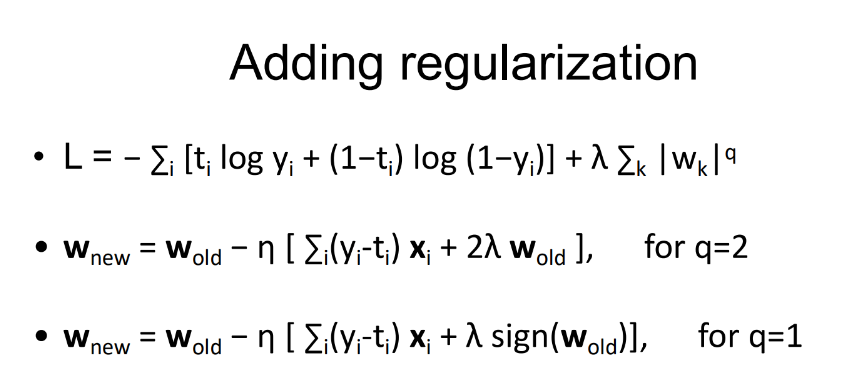

In [159]:
def BCE_gradient_descent(X_data, binary_t,learning_rate, lambda1, lambda2, max_iterations, tol=1):
    """
    Perform gradient descent to minimize BCE + λ1 L1 + λ2 L2 for linear classification.

    Parameters:
    X_data (np.ndarray): Input feature matrix of shape (n_samples as N, n_features as D)
    binary_t (np.ndarray): Binary Target vector of shape (n_samples, 1)
    learning_rate (float): Learning rate for weight updates
    lambda1 (float): Regularization parameter for L1 (Lasso)
    lambda2 (float): Regularization parameter for L2 (Ridge)
    max_iterations (int): Maximum number of iterations
    tol (float): Tolerance for stopping criterion based on loss

    Returns:
    weights (np.ndarray): Final weight vector after optimization
    bias (float): Final bias term
    losses (list): List of loss values at each iteration
    """


    weights = np.zeros(X_data.shape[1]).reshape(-1,1)  # zero initialize weights and bias term
    bias = 0
    losses = []

    for iteration in range(max_iterations):

      z = np.dot(X_data, weights) + bias
      h = sigmoid(z).reshape(-1,1)
      threshold = 0.5
      binary_y = [1 if hi > threshold else 0 for hi in h]
      binary_y = np.array(binary_y).reshape(-1,1)

      # Calculate the loss (BCE + L1 + L2 regularization)
      cost = -np.mean(binary_t * np.log(h) + (1 - binary_t) * np.log(1 - h))
      l1_reg = lambda1 * np.sum(np.abs(weights))
      l2_reg = lambda2 * np.sum(weights ** 2)
      cost = cost + l1_reg + l2_reg
      losses.append(cost)


      print(f"Iteration {iteration}, Loss: {cost}")

      # Compute the gradient where we use already defined functions
      dL_dw, dL_db = BCE_gradient(X_data, binary_t, binary_y)
      l1_gradient = gradient_L1(weights, lambda1) # Gradient of L1
      l2_gradient = gradient_L2(weights, lambda2) # Gradient of L2

      gradient = dL_dw + l1_gradient + l2_gradient

      # Update each of the parameters
      weights -= learning_rate * gradient
      bias -= learning_rate * dL_db

      # Stopping criterion: if loss does not decrease by tol unit
      if iteration > 0 and  (losses[-2] - losses[-1]) < tol:
          print(f"Converged after {iteration} iterations.")
          return weights, bias, losses

    # If the loop finishes, return the last weights and losses
    print(f"Reached maximum iterations: {max_iterations}")
    return weights, bias, losses

In [160]:
# Generating data matrix X
N = 100  # Sample size
M, D = 10, 10  # Dimensions of the generator matrix S
S = np.eye(M, D)  # Random generator Identity matrix of size MxD
X_data = getDataMatrix(N, S)
print("Generated data matrix X of size:", X_data.shape)

wt = np.random.randn(D+1).reshape(-1,1) # weight vector of size  D+1 drawn from  standard normal distribution which introduce the true weights and bias

wt = wt[:-1]
biast = wt[-1]

# Define noise standard deviation (sigma)
sigma = 0.5

# Generate binary classification target vector t
binary_t = generate_binary_targets(X_data, wt, biast, sigma)
print("Binary classification target vector t:\n", binary_t.shape)


# Set hyperparameters
learning_rate = 0.01
lambda1 = 0  # L1 regularization
lambda2 = 0  # L2 regularization
max_iterations = 100
stopping_losss = 1e-9
print(f"Stopping criteria is loss:\t {stopping_losss}")

# Perform gradient descent
weights, bias, losses = BCE_gradient_descent(
    X_data, binary_t, learning_rate, lambda1, lambda2, max_iterations, tol=stopping_losss)

Generated data matrix X of size: (100, 10)
Binary classification target vector t:
 (100, 1)
Stopping criteria is loss:	 1e-09
Iteration 0, Loss: 0.6931471805599453
Iteration 1, Loss: 0.6911475779584939
Iteration 2, Loss: 0.6902941926380903
Iteration 3, Loss: 0.690423962847718
Converged after 3 iterations.


In [161]:
z = np.dot(X_data, weights) + bias # linearly combination of weights and data with the bias term added
h = (1 / (1 + np.exp(-z))).reshape(-1,1)# calculating the logits
threshold = 0.5# classification threshold

binary_y = [1 if hi > threshold else 0 for hi in h]# if logits are above the threshold then classify them aas 1 else 0.
binary_y = np.array(binary_y).reshape(-1,1)
print("NRMSE", nrmse(binary_t, binary_y))

NRMSE 0.5301053120945679


In [162]:
def classification_experiment(N_values, lmbda2_values, D=10, M=10, sigma=0.51, lr=0.01, max_iter=1, lambda1=0):
  """
  Examine the impact of N and λ2 on the binary cross entropy loss for linear classific using gradient descent.

  Parameters:
  N_values (list): List of N values
  lmbda2_values (list): List of λ2 values
  D (int): Dimension of the input data
  M (int): Dimension of the generator matrix
  sigma (float): Noise variance
  lr (float): Learning rate
  max_iter (int): Maximum number of iterations
  lambda1 (float): L1 regularization parameter

  Returns:
  results (numpy array): Array of shape (len(N_values), len(lmbda2_values))
  containing the average NRMSE for each combination of N and λ2.
  """

  results = np.zeros((len(N_values), len(lmbda2_values)))
  # Define noise standard deviation (sigma)
  sigma = 0.1

  # zero initialize weights and bias term
  W = np.zeros(D)
  bias = 0

  for i, N in enumerate(N_values):
      for j, lmbda2 in enumerate(lmbda2_values):
          nrmse_list = []
          for _ in range(5):  # Average over 5 runs
              X_data = getDataMatrix(N, S)

              # Define random weights w and a bias term
              wt = np.random.randn(D+1).reshape(-1,1)
              wt = wt[:-1]
              biast = wt[-1]

              # Generate binary classification target vector t
              binary_t = generate_binary_targets(X_data, wt, biast, sigma)

              # Perform BCE gradient descent
              weights, bias, losses = BCE_gradient_descent(
                  X_data, binary_t, learning_rate, lambda1, lmbda2, max_iterations, tol=stopping_losss)

              binary_y = np.dot(X_data, weights) + bias
              nrmse_list.append(nrmse(binary_t, binary_y))

          print(f"\nN{i} = {N}----Lambda2-{j} = {lmbda2}--- the average NRMSE is {np.mean(nrmse_list)}")

          # Average NRMSE over 5 runs
          results[i, j] = np.mean(nrmse_list)
  return results

In [163]:
N_values = np.logspace(2, 4, 5, dtype=int)
lmbda2_values = np.logspace(-2, 2, 5)
print(N_values)
print(lmbda2_values)

[  100   316  1000  3162 10000]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [164]:
print(N_values)
print(lmbda2_values)

[  100   316  1000  3162 10000]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [165]:
results = classification_experiment(N_values, lmbda2_values, max_iter=100, lambda1=0)

Iteration 0, Loss: 0.6931471805599453
Iteration 1, Loss: 0.6921238391266206
Iteration 2, Loss: 0.6908494630972613
Iteration 3, Loss: 0.6908934867295964
Converged after 3 iterations.
Iteration 0, Loss: 0.6931471805599453
Iteration 1, Loss: 0.6905963025718052
Iteration 2, Loss: 0.6898839556993663
Iteration 3, Loss: 0.6899189371302614
Converged after 3 iterations.
Iteration 0, Loss: 0.6931471805599453
Iteration 1, Loss: 0.692106912692782
Iteration 2, Loss: 0.6903251381888377
Iteration 3, Loss: 0.6903426483082697
Converged after 3 iterations.
Iteration 0, Loss: 0.6931471805599453
Iteration 1, Loss: 0.6910465587264137
Iteration 2, Loss: 0.690332960247756
Iteration 3, Loss: 0.690301147776848
Iteration 4, Loss: 0.6902924220435355
Iteration 5, Loss: 0.690285831436529
Iteration 6, Loss: 0.6903069235747833
Converged after 6 iterations.
Iteration 0, Loss: 0.6931471805599453
Iteration 1, Loss: 0.6922671996177538
Iteration 2, Loss: 0.6913240600332146
Iteration 3, Loss: 0.6912767703851268
Iteration 

In [166]:
for N_index in range(len(N_values)):
  lambda_index = np.argmin(results[N_index])# get the index of lambda
  lambda_value = lmbda2_values[lambda_index]# pick the lambda value
  print(f"The optimal lambda2 value for N={N_values[N_index]} is {lambda_value}")

The optimal lambda2 value for N=100 is 0.01
The optimal lambda2 value for N=316 is 0.1
The optimal lambda2 value for N=1000 is 0.01
The optimal lambda2 value for N=3162 is 1.0
The optimal lambda2 value for N=10000 is 0.01


##### Comment on question 15:
* Similar to question number 10, there appears no particular trend or corrleation. But, we can see that for different or a group of sample sizes, different values of lambda2 gives better results.

* We can see that the the lambda2 of 0.01 works well for sample sizes 100, 1000, 10000. On the other hand, lambda2 of  0.1 obtains better result with N = 316, and lambda2 equals to 1, gives best result with N=3162

# Referenes
[1] ChatGPT Prompt:

    how to generate an input data matrix X of size NxD for regression.
    a)	Input: Sample size N and a generator matrix S of size MxD
    b)	Working: First generate a random 2-D array of size NxM where each column has
          a standard normal distribution and is independent of the other columns.
          Then multiply this with the generator matrix S of size MxD to give an output matrix
          X of size NxD. The idea here is that if the generator matrix S of size MxD is an identity matrix, then each column of
          X will remain independent; otherwise we can introduce correlations in the matrix columns of X.

[2] ChatGPT Prompt:


    please help me understand the difference between np.random.rand vs np.random.randn
    With a very simple example and visualization



[3] [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)


[4] [numpy.linalg.pinv](https://numpy.org/doc/2.0/reference/generated/numpy.linalg.pinv.html)

[5] ChatGPT Prompt:


    * Examine the behavior of the analytical solver based on pseudo-inverse (pinv) in numpy.linalg package with respect to the size of the data matrix X

    * Plot a graph of the time taken with respect to N (use log scale for both axes), with D fixed to 10. Is there any strange behavior in time taken to solve the problem above a particular value of N? What could be the reason for the same? [1]

[6] Otto, S.A. (2019, Jan.,7). How to normalize the RMSE [Blog post]. Retrieved from
  https://www.marinedatascience.co/blog/2019/01/07/normalizing-the-rmse/

[7] ChatGPT Prompt:


    \begin{align*}\\
    Y &= W^T X + B  \\
    Y\ repsents\ \ the\ linear\ regression\ equation where\ W\  is\ the\ weight\ vector\ and\ B\ is\ the\ bias\
    term. \\
    \text{MSE} &= \frac{1}{n} \sum_{i=1}^{n} \left( t_i - y_i \right)^2 \\
    \frac{\partial \text{MSE}}{\partial w} &= \frac{-2}{n} \sum_{i=1}^{n} \left(t_i - y_i\right) x_i\\
    \frac{\partial \text{MSE}}{\partial b} &= \frac{-2}{n} \sum_{i=1}^{n} \left(t_i - y_i\right)
    \end{align*}


    python code of this  

[8], [9], [10], [12] Gemini suggestion with significant modification by me.


[11] https://numpy.org/doc/2.0/reference/generated/numpy.logspace.html